In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# prevent "kernel died" error because of matplotlib:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
torch.manual_seed(2)
np.random.seed(2)

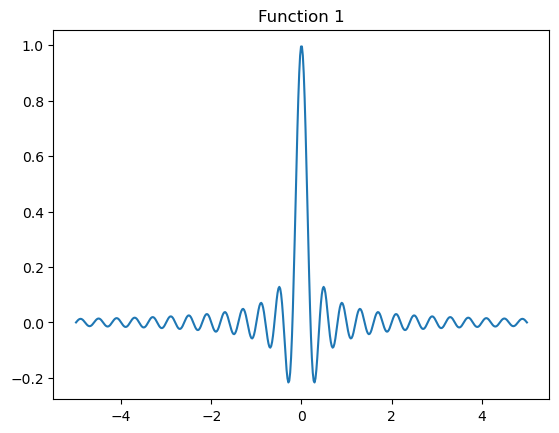

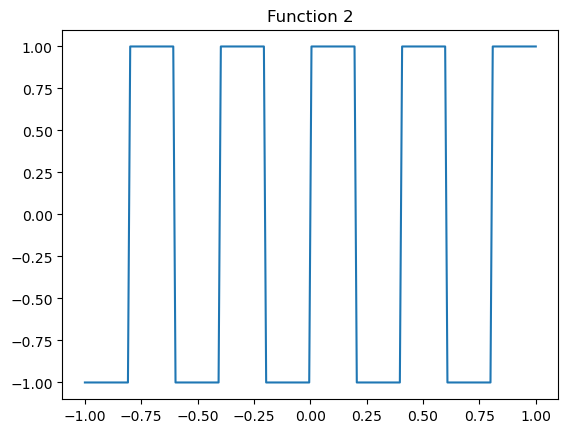

In [3]:
# input function
x = torch.linspace(-5,5,500)
x = torch.unsqueeze(x,dim=1)
y = (np.sin(5*np.pi*x))/5/np.pi/x

x = x.clone().detach()
y = y.clone().detach()

plt.plot(x, y)
plt.title('Function 1')
plt.show()

# second function
x1 = torch.linspace(-1,1,200)
x1 = torch.unsqueeze(x1,dim=1)
y1 = np.sign(np.sin(5*np.pi*x1))

x1 = x1.clone().detach()
y1 = y1.clone().detach()

plt.plot(x1, y1)
plt.title('Function 2')
plt.show()

In [4]:
# models
class model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                nn.Linear(1,5),
                nn.ReLU(),
                nn.Linear(5,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,5),
                nn.ReLU(),
                nn.Linear(5,1)
        )
        self.loss_fnc = nn.MSELoss()

    def forward(self, x):
        return self.layers(x)

class model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                nn.Linear(1,10),
                nn.ReLU(),
                nn.Linear(10,18),
                nn.ReLU(),
                nn.Linear(18,15),
                nn.ReLU(),
                nn.Linear(15,4),
                nn.ReLU(),
                nn.Linear(4,1)
        )
        self.loss_fnc = nn.MSELoss()

    def forward(self, x):
        return self.layers(x)

class model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                nn.Linear(1,190),
                nn.ReLU(),
                nn.Linear(190,1)
        )
        self.loss_fnc = nn.MSELoss()

    def forward(self, x):
        return self.layers(x)

In [5]:
def train_fcn(model, x, y, n_epoch):
    optim = torch.optim.Adam(model.parameters(), lr=1e-3)
    epochs = []; epoch_err = []
    for ep in range(n_epoch):
        epochs.append(ep)
        y_pred = model(x)
        loss = model.loss_fnc(y_pred, y)
        loss.backward()
        epoch_err.append(loss.detach().numpy())
        optim.step()
        optim.zero_grad()
        if ep%500==0:
            print('Epoch #: {}, Loss = {}'.format(ep,loss.detach().numpy()))
    return y_pred, epochs, epoch_err

In [6]:
def run_model(model, x, y, n_epoch=20_000):
    morel_pred, model_ep, model_err = train_fcn(model, x, y, n_epoch)
    return morel_pred, model_ep, model_err

In [7]:
def execute(x,y,fnc_num):
    print('Run Model 1 for function {}..'.format(fnc_num))
    m1_pred, m1_ep, m1_ep_err = run_model(model1(), x, y)
    
    print('\nRun Model 2 for function {}..'.format(fnc_num))
    m3_pred, m2_ep, m2_ep_err = run_model(model2(), x, y)

    print('\nRun Model 3 for function {}..'.format(fnc_num))
    m2_pred, m3_ep, m3_ep_err = run_model(model3(), x, y)

    plt.figure(figsize=(10,5))
    plt.plot(m1_ep,m1_ep_err,label='Model 1')
    plt.plot(m2_ep,m2_ep_err,label='Model 2')
    plt.plot(m3_ep,m3_ep_err,label='Model 3')
    plt.title('Per Epoch Loss (Function {})'.format(fnc_num))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(15,5))
    plt.plot(x,y,linewidth=3,label='True Value')
    plt.plot(x,m1_pred.data,label='Model 1')
    plt.plot(x,m2_pred.data,label='Model 2')
    plt.plot(x,m3_pred.data,label='Model 3')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Prediction')
    plt.show()

    return m1_pred, m1_ep, m1_ep_err, m3_pred, m2_ep, m2_ep_err, m2_pred, m3_ep, m3_ep_err

Run Model 1 for function 1..
Epoch #: 0, Loss = 0.1362752467393875
Epoch #: 500, Loss = 0.0018596950685605407
Epoch #: 1000, Loss = 0.0013040377525612712
Epoch #: 1500, Loss = 0.0007969875005073845
Epoch #: 2000, Loss = 0.0006724629201926291
Epoch #: 2500, Loss = 0.0005527845933102071
Epoch #: 3000, Loss = 0.0005389910656958818
Epoch #: 3500, Loss = 0.0005229894304648042
Epoch #: 4000, Loss = 0.0005130048957653344
Epoch #: 4500, Loss = 0.0005087312893010676
Epoch #: 5000, Loss = 0.0005058693350292742
Epoch #: 5500, Loss = 0.0005096233799122274
Epoch #: 6000, Loss = 0.0005006254650652409
Epoch #: 6500, Loss = 0.0005057980888523161
Epoch #: 7000, Loss = 0.0004978587967343628
Epoch #: 7500, Loss = 0.0004970895824953914
Epoch #: 8000, Loss = 0.0004986541462130845
Epoch #: 8500, Loss = 0.0004983762628398836
Epoch #: 9000, Loss = 0.0004967934801243246
Epoch #: 9500, Loss = 0.0004952045856043696
Epoch #: 10000, Loss = 0.0005000571836717427
Epoch #: 10500, Loss = 0.000496314256452024
Epoch #: 

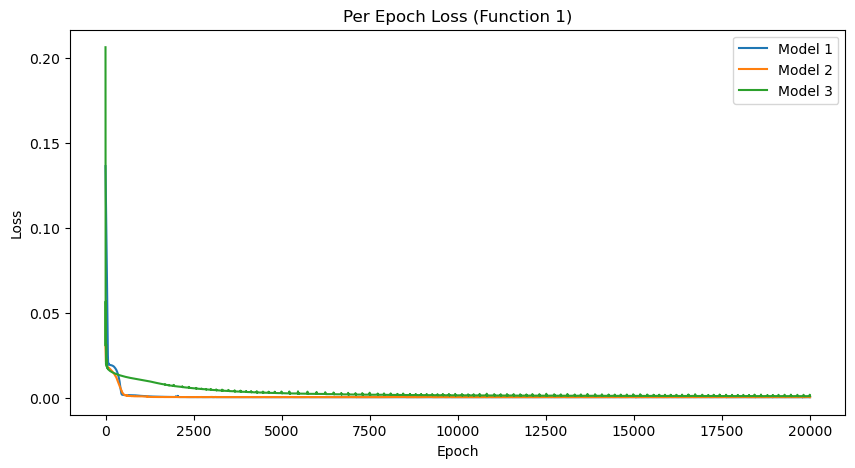

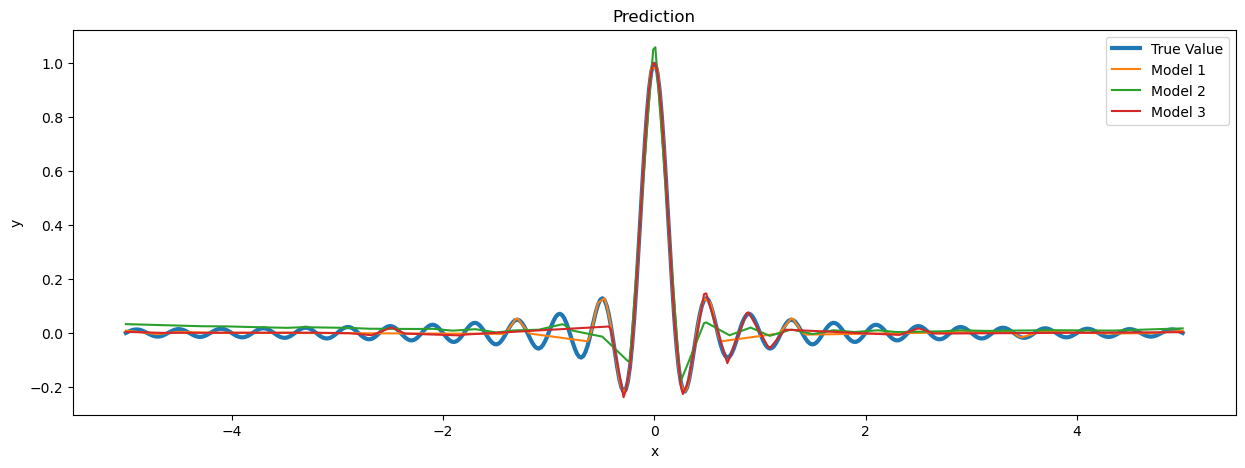

Run Model 1 for function 2..
Epoch #: 0, Loss = 1.0532150268554688
Epoch #: 500, Loss = 0.9133474826812744
Epoch #: 1000, Loss = 0.19709879159927368
Epoch #: 1500, Loss = 0.044499170035123825
Epoch #: 2000, Loss = 0.0256729144603014
Epoch #: 2500, Loss = 0.01635831780731678
Epoch #: 3000, Loss = 0.011093921959400177
Epoch #: 3500, Loss = 0.0065827579237520695
Epoch #: 4000, Loss = 0.004771343432366848
Epoch #: 4500, Loss = 0.0031531481072306633
Epoch #: 5000, Loss = 0.0030761314556002617
Epoch #: 5500, Loss = 0.0017337494064122438
Epoch #: 6000, Loss = 0.0012748383451253176
Epoch #: 6500, Loss = 0.006002436857670546
Epoch #: 7000, Loss = 0.003291339846327901
Epoch #: 7500, Loss = 0.0026047860737890005
Epoch #: 8000, Loss = 0.0035565881989896297
Epoch #: 8500, Loss = 0.001701637520454824
Epoch #: 9000, Loss = 0.0013832316035404801
Epoch #: 9500, Loss = 0.000968247652053833
Epoch #: 10000, Loss = 0.0006895835977047682
Epoch #: 10500, Loss = 0.0005032598273828626
Epoch #: 11000, Loss = 0.

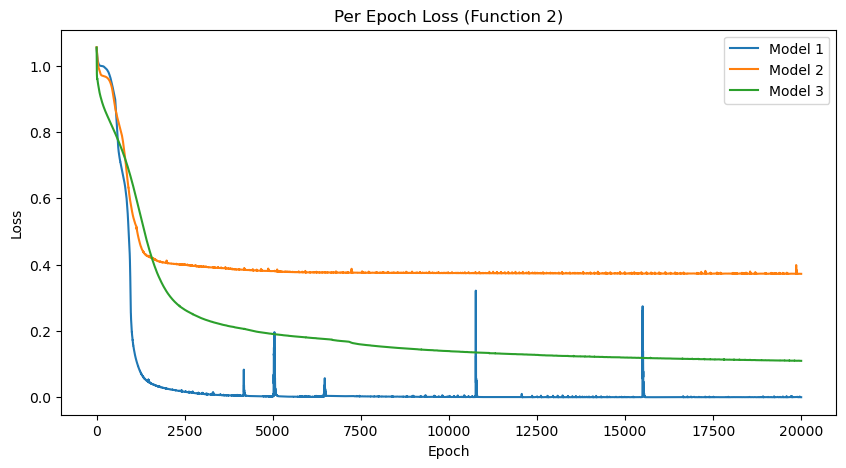

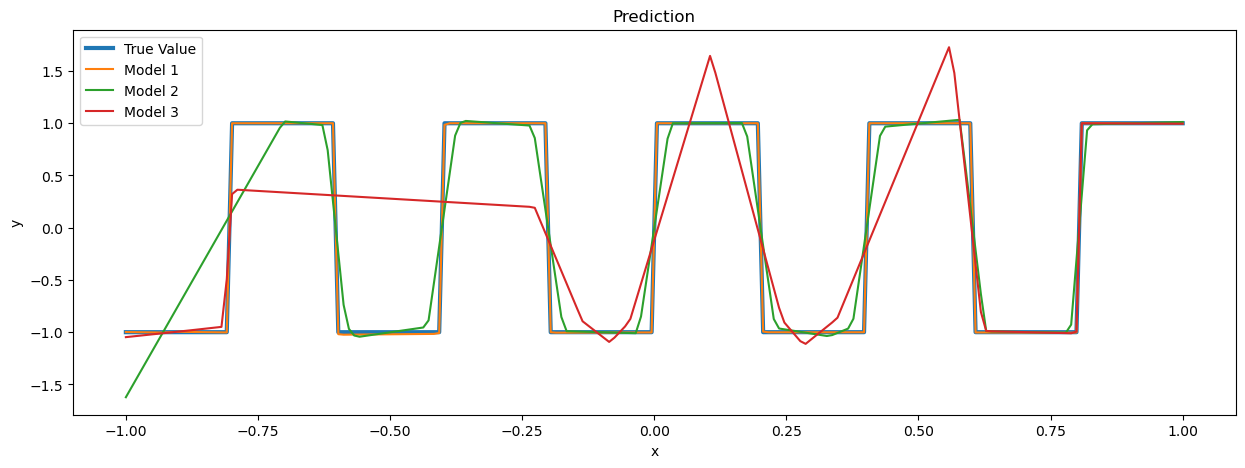

In [8]:
if __name__=='__main__':
    fnc_one_res = execute(x,y,1)
    fnc_two_res = execute(x1,y1,2)